<a href="https://colab.research.google.com/github/mcharara92/TrussLattices/blob/main/Process_TrussLattices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import h5py
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
#trussLattice = files.upload()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math



In [48]:
#trussLattice_df = pd.DataFrame(trussLattice)
trussLattice = h5py.File("/content/drive/MyDrive/3. Truss Lattice Inverse Design PR/data/data/1030000_rho_0d01_octet_sc_data.h5", 'r')
print(type(trussLattice))
#print(list(trussLattice.values())[0:1])
print(trussLattice.keys())
#print(trussLattice.values())
#print(trussLattice.items())
#print(list(trussLattice.values())[0:1])
#print(list(trussLattice.items())[0:2])

<class 'h5py._hl.files.File'>
<KeysViewHDF5 ['frequencies', 'k_vector', 'radii', 'rho']>


In [157]:
nxi = 21
# Gamma-->X-->M-->Gamma-->R-->M-->X-->R-->Gamma
#create each edge of the BZ
Gam_X = np.round(np.column_stack([np.linspace(0, np.pi, nxi), np.linspace(0, 0, nxi), np.linspace(0, 0, nxi)]), 5)
X_M = np.round(np.column_stack([np.linspace(np.pi, np.pi, nxi), np.linspace(0, np.pi, nxi), np.linspace(0, 0, nxi)]), 5)
M_Gam = np.round(np.column_stack([np.linspace(np.pi, 0, nxi), np.linspace(np.pi, 0, nxi), np.linspace(0, 0, nxi)]), 5)
Gam_R = np.round(np.column_stack([np.linspace(0, np.pi, nxi), np.linspace(0, np.pi, nxi), np.linspace(0, np.pi, nxi)]), 5)
R_M = np.round(np.column_stack([np.linspace(np.pi, np.pi, nxi), np.linspace(np.pi, np.pi, nxi), np.linspace(np.pi, 0, nxi)]), 5)
X_R = np.round(np.column_stack([np.linspace(np.pi, np.pi, nxi), np.linspace(0, np.pi, nxi), np.linspace(0, np.pi, nxi)]), 5)

# Intersect calculations
#make helper function to help us find the edges of the BZ from the k_vectors provided
def intersect_rows(arr1, arr2):
    return np.nonzero((arr1[:, None] == arr2).all(-1))[0]

# Assuming xi_Calcs is already defined
Gam_X_ind = intersect_rows(trussLattice['k_vector'][:,:], Gam_X) #trussLattice is a dictionary that holds all the data in the .h5 file
X_M_ind = intersect_rows(trussLattice['k_vector'][:,:], X_M)
M_Gam_ind = intersect_rows(trussLattice['k_vector'][:,:], M_Gam)
Gam_R_ind = intersect_rows(trussLattice['k_vector'][:,:], Gam_R)
R_M_ind = intersect_rows(trussLattice['k_vector'][:,:], R_M)
X_R_ind = intersect_rows(trussLattice['k_vector'][:,:], X_R)

# Concatenate and modify IBZ order
#put together all of the edges...some index orders are reversed due to their ordering in the 'k_vectors' matrix/frame
IBZorder = np.concatenate([Gam_X_ind, X_M_ind, M_Gam_ind[::-1], Gam_R_ind, R_M_ind[::-1], X_M_ind[::-1], X_R_ind])

# Remove specific indices
#getting rid of duplicates at the intersection of the IBZ
indices_to_remove = [nxi-1, 2*nxi-1, 3*nxi-1, 4*nxi-1, 5*nxi-1, 6*nxi-1]
IBZorder = np.delete(IBZorder, indices_to_remove)


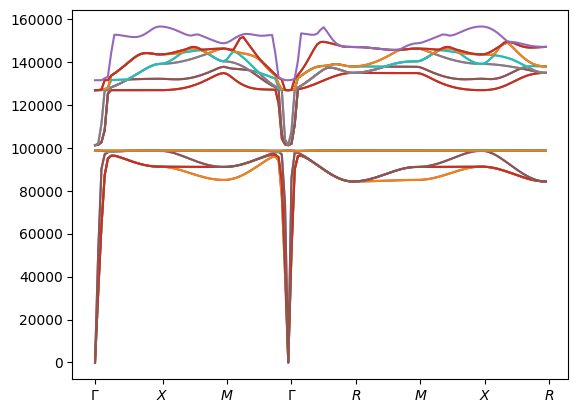

In [154]:
#plt.plot(trussLattice['frequencies'][IBZorder,:])
# plt.plot(np.array(trussLattice['frequencies'])[IBZorder,:])
plt.plot(np.array(trussLattice['frequencies'])[:,:][IBZorder,:])
plt.xticks(ticks=[0,nxi,2*nxi-1,3*nxi-2,4*nxi-3,5*nxi-4,6*nxi-5,7*nxi-6],labels=[r'$\Gamma$',r'$X$',r'$M$',r'$\Gamma$',r'$R$',r'$M$',r'$X$',r'$R$'])
# ax.set_xticklabels([r'$\Gamma$',r'$X$',r'$M$',r'$\Gamma$',r'$R$',r'$M$',r'$X$',r'$R$'])
# np.transpose(np.array(trussLattice['frequencies'])[:,:])
# IBZorder
plt.show()

In [155]:
np.array(trussLattice['k_vector'])[IBZorder,:]

array([[0.     , 0.     , 0.     ],
       [0.15708, 0.     , 0.     ],
       [0.31416, 0.     , 0.     ],
       [0.47124, 0.     , 0.     ],
       [0.62832, 0.     , 0.     ],
       [0.7854 , 0.     , 0.     ],
       [0.94248, 0.     , 0.     ],
       [1.09956, 0.     , 0.     ],
       [1.25664, 0.     , 0.     ],
       [1.41372, 0.     , 0.     ],
       [1.5708 , 0.     , 0.     ],
       [1.72788, 0.     , 0.     ],
       [1.88496, 0.     , 0.     ],
       [2.04204, 0.     , 0.     ],
       [2.19911, 0.     , 0.     ],
       [2.35619, 0.     , 0.     ],
       [2.51327, 0.     , 0.     ],
       [2.67035, 0.     , 0.     ],
       [2.82743, 0.     , 0.     ],
       [2.98451, 0.     , 0.     ],
       [3.14159, 0.     , 0.     ],
       [3.14159, 0.15708, 0.     ],
       [3.14159, 0.31416, 0.     ],
       [3.14159, 0.47124, 0.     ],
       [3.14159, 0.62832, 0.     ],
       [3.14159, 0.7854 , 0.     ],
       [3.14159, 0.94248, 0.     ],
       [3.14159, 1.09956, 0.